In [501]:
# library imports
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import re


In [502]:
#import data
products_df = pd.read_json('data/reviews.json')


#number of reviews column
products_df['n_reviews'] = products_df['reviews'].apply(lambda rev: len(rev))

products_df = products_df[products_df['n_reviews'] != 0]

#avg_star_rating column
def avg_rating(rev):
    tot = 0
    numReviews = len(rev)
    for review in rev:
        tot += review['star_ratings']
    return tot / numReviews

products_df['avg_rating'] = products_df['reviews'].apply(avg_rating)

products_df.head()

,product_link,product_name,product_description,product_price,reviews,n_reviews,avg_rating
0,https://www.nuuly.com/rent/products/mirage-hig...,Mirage High-Rise Fitted Shorts,The Australian designer couple behind cult-fav...,109,"[{'review_posted_by_username': 'CCPenn', 'user...",11,4.000000
1,https://www.nuuly.com/rent/products/floral-pri...,Floral Printed Cutout Maxi Dress,Founded in Mexico City by French designers Aud...,238,"[{'review_posted_by_username': 'Clothing123', ...",8,1.875000
2,https://www.nuuly.com/rent/products/check-prin...,Check Print Slip Skirt,,68,"[{'review_posted_by_username': 'lcolville', 'u...",16,4.312500
3,https://www.nuuly.com/rent/products/serve-coll...,Serve Collared Bodysuit,Gathering inspiration from the past and interp...,58,"[{'review_posted_by_username': 'SH22', 'user_s...",16,3.312500
4,https://www.nuuly.com/rent/products/skipper-bu...,Skipper Buttondown Top,The ultimate destination for slip-it-on and go...,139,"[{'review_posted_by_username': 'Denise21', 'us...",23,4.086957


In [503]:
products_df['reviews'][0][1]

{'review_posted_by_username': 'Cactusfeathers',
 'user_size': 'L',
 'user_color': 'red',
 'user_height': '5\'5"',
 'user_weight': '144 lbs.',
 'user_body_type': 'Straight',
 'user_bra_size': '36B',
 'user_age': '35',
 'review_date': '09/18/23',
 'review_title': 'Second try',
 'review_text': 'I rented these in my usual size last time and they were just too snug. The large was better but the fit was still off for me. Bummed because the material is nice.',
 'star_ratings': 3}

In [504]:
#Count Null
products_df.isna().sum()

product_link           0
product_name           0
product_description    0
product_price          0
reviews                0
n_reviews              0
avg_rating             0
dtype: int64

In [505]:
products_df.describe()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3422 entries, 0 to 3645
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_link         3422 non-null   object 
 1   product_name         3422 non-null   object 
 2   product_description  3422 non-null   object 
 3   product_price        3422 non-null   int64  
 4   reviews              3422 non-null   object 
 5   n_reviews            3422 non-null   int64  
 6   avg_rating           3422 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 342.9+ KB


In [506]:
products_df['reviews'][0]

[{'review_posted_by_username': 'CCPenn',
  'user_size': 'XL',
  'user_color': 'red',
  'user_height': '5\'8"',
  'user_weight': '214 lbs.',
  'user_body_type': 'Hourglass',
  'user_bra_size': '40D',
  'user_age': '39',
  'review_date': '10/09/23',
  'review_title': 'Super cute but too small',
  'review_text': 'The item was in great condition and was super cute. An XL didn’t fit me though.',
  'star_ratings': 4},
 {'review_posted_by_username': 'Cactusfeathers',
  'user_size': 'L',
  'user_color': 'red',
  'user_height': '5\'5"',
  'user_weight': '144 lbs.',
  'user_body_type': 'Straight',
  'user_bra_size': '36B',
  'user_age': '35',
  'review_date': '09/18/23',
  'review_title': 'Second try',
  'review_text': 'I rented these in my usual size last time and they were just too snug. The large was better but the fit was still off for me. Bummed because the material is nice.',
  'star_ratings': 3},
 {'review_posted_by_username': 'erinmh29',
  'user_size': 'M',
  'user_color': 'red',
  'user

<Axes: >

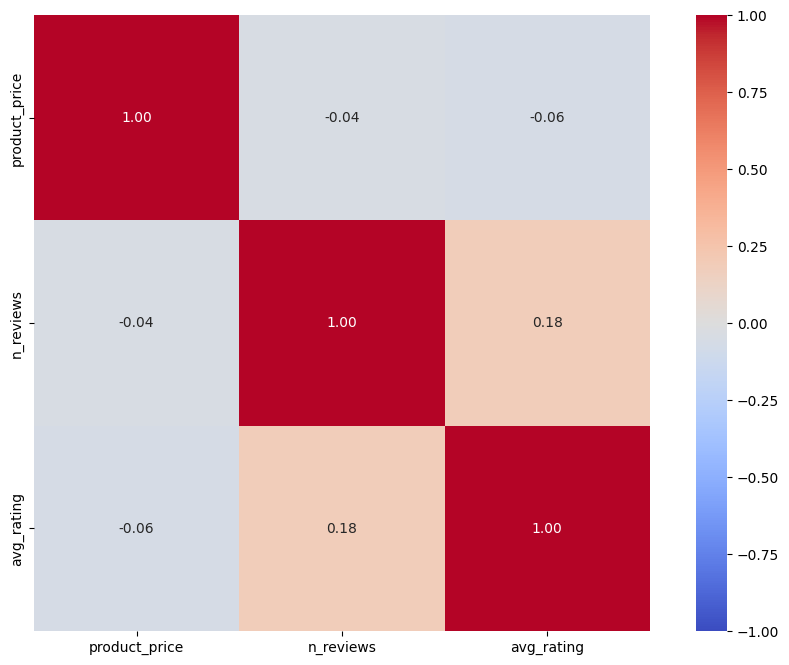

In [507]:
corr_matrix = products_df[["product_price", "n_reviews", "avg_rating"]].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f', square=True)

<Axes: xlabel='product_price', ylabel='avg_rating'>

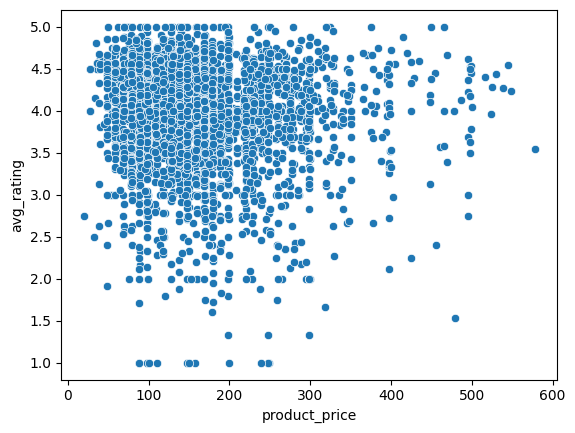

In [508]:
sns.scatterplot(data = products_df, x = "product_price", y = "avg_rating")

<Axes: >

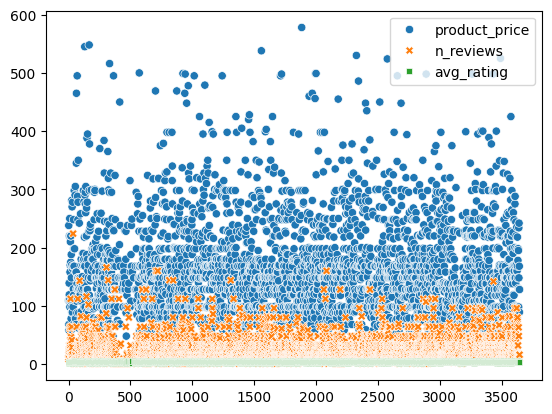

In [509]:
sns.scatterplot(data = products_df)

In [510]:
products_df

,product_link,product_name,product_description,product_price,reviews,n_reviews,avg_rating
0,https://www.nuuly.com/rent/products/mirage-hig...,Mirage High-Rise Fitted Shorts,The Australian designer couple behind cult-fav...,109,"[{'review_posted_by_username': 'CCPenn', 'user...",11,4.000000
1,https://www.nuuly.com/rent/products/floral-pri...,Floral Printed Cutout Maxi Dress,Founded in Mexico City by French designers Aud...,238,"[{'review_posted_by_username': 'Clothing123', ...",8,1.875000
2,https://www.nuuly.com/rent/products/check-prin...,Check Print Slip Skirt,,68,"[{'review_posted_by_username': 'lcolville', 'u...",16,4.312500
3,https://www.nuuly.com/rent/products/serve-coll...,Serve Collared Bodysuit,Gathering inspiration from the past and interp...,58,"[{'review_posted_by_username': 'SH22', 'user_s...",16,3.312500
4,https://www.nuuly.com/rent/products/skipper-bu...,Skipper Buttondown Top,The ultimate destination for slip-it-on and go...,139,"[{'review_posted_by_username': 'Denise21', 'us...",23,4.086957
...,...,...,...,...,...,...,...
3641,https://www.nuuly.com/rent/products/puzzle-gin...,Puzzle Gingham Mini Dress,Featuring fearless-yet-wearable statement piec...,242,"[{'review_posted_by_username': 'LexieDexie', '...",16,3.750000
3642,https://www.nuuly.com/rent/products/camella-mi...,Camella Mini Dress,Gathering inspiration from the past and interp...,128,[{'review_posted_by_username': 'Fennie_from_th...,16,3.562500
3643,https://www.nuuly.com/rent/products/hailee-lac...,Hailee Lace Mini Dress,Gathering inspiration from the past and interp...,168,"[{'review_posted_by_username': 'mcpumpkin', 'u...",9,4.111111
3644,https://www.nuuly.com/rent/products/lace-up-fl...,Lace-Up Flutter Sleeve Dress,"Dubbing themselves ""trend-inspired"", ASTR The ...",89,"[{'review_posted_by_username': 'Jessguz', 'use...",16,4.187500


In [511]:
reviews_list = list(products_df['reviews'].apply(lambda x: x[0]))
reviews_df = pd.DataFrame(reviews_list)
reviews_df = reviews_df.drop(['review_date', 'review_posted_by_username'], axis=1)

In [512]:
# remove rows with na
# we lose abt 350 rows
print(reviews_df.isna().sum())
print(reviews_df.shape)
reviews_df = reviews_df.dropna()
print(reviews_df.isna().sum())
print(reviews_df.shape)


user_size           0
user_color         13
user_height        56
user_weight       104
user_body_type    245
user_bra_size     105
user_age           95
review_title        0
review_text         0
star_ratings        0
dtype: int64
(3422, 10)
user_size         0
user_color        0
user_height       0
user_weight       0
user_body_type    0
user_bra_size     0
user_age          0
review_title      0
review_text       0
star_ratings      0
dtype: int64
(3087, 10)


In [513]:
def parse_height(x):
    if '\"' in x:
        x = x.replace('\"', '')
    if '\'' in x:
        x = x.replace('\'', ' ')
    split = x.split(' ')
    if len(x) <= 2:
        return int(split[0]) * 12
    return int(split[0]) * 12 + int(split[1])

In [514]:
def parse_weight(x):
    return int(x[:-5])

In [515]:
# converting dtype for height, age, weight
# parse height and weight strings into int
# heigh is now in inches
reviews_df['user_height'] = reviews_df['user_height'].apply(lambda x: parse_height(x))
reviews_df['user_age'] = reviews_df['user_age'].apply(lambda x: int(x))
reviews_df['user_weight'] = reviews_df['user_weight'].apply(lambda x: parse_weight(x))
print(reviews_df.dtypes)

user_size         object
user_color        object
user_height        int64
user_weight        int64
user_body_type    object
user_bra_size     object
user_age           int64
review_title      object
review_text       object
star_ratings       int64
dtype: object


In [516]:
# one hot encoding categories
reviews_df = pd.get_dummies(data=reviews_df, columns=['user_size', 'user_color', 'user_body_type', 'user_bra_size'])
reviews_df

,user_height,user_weight,user_age,review_title,review_text,star_ratings,user_size_0,user_size_0 P,user_size_00 P,user_size_1,...,user_bra_size_44DDD,user_bra_size_44E,user_bra_size_44G,user_bra_size_44H,user_bra_size_44I,user_bra_size_46C,user_bra_size_46DD,user_bra_size_48DD,user_bra_size_50B,user_bra_size_70E
0,68,214,39,Super cute but too small,The item was in great condition and was super ...,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,65,120,28,Makes no sense,Its not worth the amount of effort to out on a...,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,67,170,23,So cute!!,I’m so happy this fit! I’m curvy so normally s...,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,70,190,33,Weird fit,Not long enough and very tight in chest,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,65,150,37,Fine but nothing else in pack fits so returning,Fine but nothing else in pack fits so returning,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3417,61,130,27,OBSESSED with this dress,I have larger butt/thighs so I sized up to a m...,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3418,68,253,34,Light and airy,I wore this as a coverup for a boat day. The m...,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3419,66,140,26,fun vintage inspired piece!,It arrived new with tags and was absolutely pe...,5,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3420,65,142,31,Great fit minus the incorrect sewing,This item needed quality control it looked nic...,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [517]:
# train test split
from sklearn.model_selection import train_test_split 
y = reviews_df['star_ratings']
X = reviews_df.drop(['star_ratings'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2469, 297) (2469,) (618, 297) (618,)
